In [126]:
#Import Operating System
import os 

In [127]:
#Set working Directory
os.chdir("/Users/abhishekvigg/Documents/Train And Test Data")
os.getcwd()

'/Users/abhishekvigg/Documents/Train And Test Data'

In [128]:
#Import All The Important Libraries
import matplotlib as mlt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import random
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix


In [129]:
#Import Train Data
df_train = pd.read_csv("Train_data.csv")

In [130]:
#Import Test Data
df_test = pd.read_csv("Test_data.csv")

In [131]:
#Check first 10 rows of train data
df_train.head(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [132]:
#Check Summary Statistics of numeric data in train data
df_train.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [133]:
#Checking The Type Of Variables in train data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                            3333 non-null object
account length                   3333 non-null int64
area code                        3333 non-null int64
phone number                     3333 non-null object
international plan               3333 non-null object
voice mail plan                  3333 non-null object
number vmail messages            3333 non-null int64
total day minutes                3333 non-null float64
total day calls                  3333 non-null int64
total day charge                 3333 non-null float64
total eve minutes                3333 non-null float64
total eve calls                  3333 non-null int64
total eve charge                 3333 non-null float64
total night minutes              3333 non-null float64
total night calls                3333 non-null int64
total night charge               3333 non-null float64
total intl minutes           

In [134]:
#Checking For The Number Of Outliers in train data
df_train.isnull().any()


state                            False
account length                   False
area code                        False
phone number                     False
international plan               False
voice mail plan                  False
number vmail messages            False
total day minutes                False
total day calls                  False
total day charge                 False
total eve minutes                False
total eve calls                  False
total eve charge                 False
total night minutes              False
total night calls                False
total night charge               False
total intl minutes               False
total intl calls                 False
total intl charge                False
number customer service calls    False
Churn                            False
dtype: bool

In [135]:
#Checking for number of outliers in test data
df_test.isnull().any()

state                            False
account length                   False
area code                        False
phone number                     False
international plan               False
voice mail plan                  False
number vmail messages            False
total day minutes                False
total day calls                  False
total day charge                 False
total eve minutes                False
total eve calls                  False
total eve charge                 False
total night minutes              False
total night calls                False
total night charge               False
total intl minutes               False
total intl calls                 False
total intl charge                False
number customer service calls    False
Churn                            False
dtype: bool

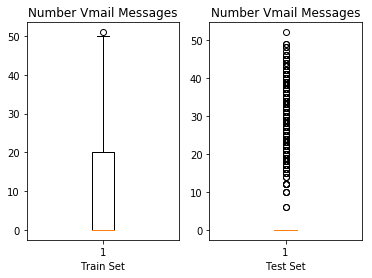

In [136]:
#Plotting Outliers In Grids
#Outlier Analysis For Number Vmail Messages
plt.subplot(1,2,1)
#plt.plot(df_train['number vmail messages'].plot(kind='box'))
plt.boxplot(df_train['number vmail messages'])
plt.xlabel('Train Set')
plt.title("Number Vmail Messages")
plt.subplot(1,2,2)
plt.boxplot(df_test['number vmail messages'])
plt.xlabel('Test Set')
plt.title("Number Vmail Messages")
plt.show()

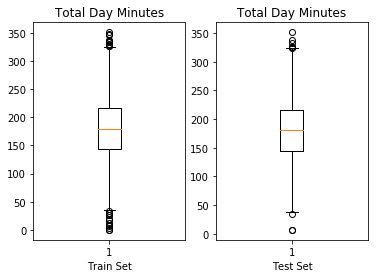

In [137]:
plt.subplot(1,2,1)
#plt.plot(df_train['number vmail messages'].plot(kind='box'))
plt.boxplot(df_train['total day minutes'])
plt.xlabel('Train Set')
plt.title("Total Day Minutes")
plt.subplot(1,2,2)
plt.boxplot(df_test['total day minutes'])
plt.xlabel('Test Set')
plt.title("Total Day Minutes")
plt.show()

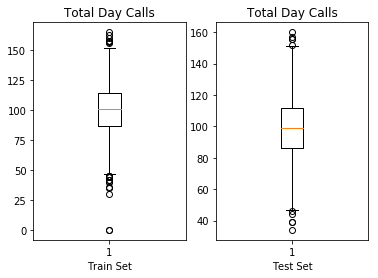

In [138]:
plt.subplot(1,2,1)
#plt.plot(df_train['number vmail messages'].plot(kind='box'))
plt.boxplot(df_train['total day calls'])
plt.title("Total Day Calls")
plt.xlabel('Train Set')
plt.subplot(1,2,2)
plt.boxplot(df_test['total day calls'])
plt.title("Total Day Calls")
plt.xlabel('Test Set')
plt.show()

In [139]:
#Performing Correlation Analysis using Correlation Plot and Chi Square Tests
#Segregating the data with numeric type
numeric_data = df_train.select_dtypes(include=[np.number])

In [140]:
#Finding the column names of the data
cnames = numeric_data.columns.tolist()

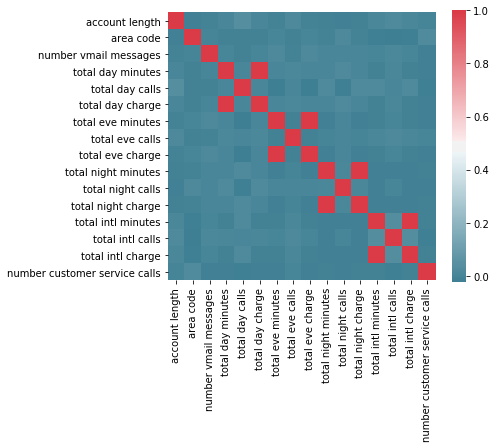

In [141]:
#Setting pane width
f, ax = plt.subplots(figsize=(6,5))
#Generating Correlation Matrix
corr = numeric_data.corr()
#Plot Using Seaborne Library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
#The pairs total day charge ~ total day minutes,total eve charge ~ total eve minutes,total night charge ~ total night minutes
#and total intl charge and total intl minutes seem to be correlated
#We have to remove the variables total intl charge,total eve charge,total night minutes and total day charge from dataset

In [142]:
list_removed = ["total intl charge","total eve charge","total night minutes","total day charge"]

In [143]:
#Segregating the categorical Data
categorical_data = df_train.select_dtypes(include = object)

In [144]:
#Making a list of column names of categorical data
cat_names = categorical_data.columns.tolist()



In [145]:
cat_names = cat_names[0:4]
cat_names

['state', 'phone number', 'international plan', 'voice mail plan']

In [146]:
#Phone Number seems to be statistically insignificant
for i in cat_names:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(df_train['Churn'], df_train[i]))
    print(p)

state
0.002296221552011188
phone number
0.49185608455943547
international plan
2.4931077033159556e-50
voice mail plan
5.15063965903898e-09


In [147]:
#Adding Phone Number to the list
list_removed = ["total intl charge","total eve charge","total night minutes","total day charge","phone number"]
 

Text(0.5,1,'Test Set')

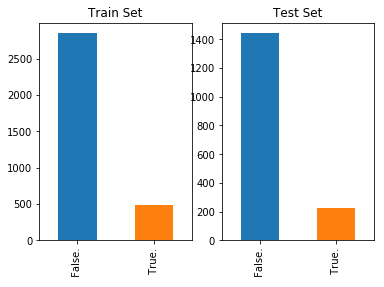

In [148]:
#Exploratory Data Analysis
plt.subplot(1,2,1)
df_train['Churn'].value_counts().plot(kind = "bar")
plt.title("Train Set")
plt.subplot(1,2,2)
df_test['Churn'].value_counts().plot(kind = 'bar')
plt.title("Test Set")
#There seems to be a class imbalance problem

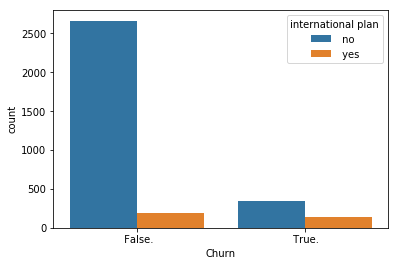

In [149]:
#Barplot of Churn vs International Plan 
ax = sns.countplot(x="Churn", hue="international plan", data=df_train)

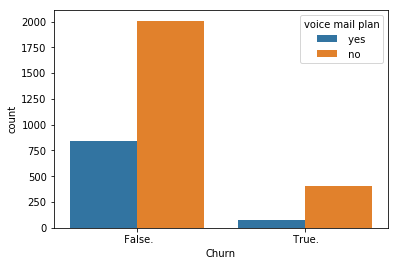

In [150]:
ax2 = sns.countplot(x="Churn", hue="voice mail plan", data=df_train)

In [151]:
#Tabulating the mean customer calls for churned and retained customers
mean_customer_calls = pd.DataFrame(df_train.groupby('Churn')['number customer service calls'].mean())
mean_customer_calls

,number customer service calls
Churn,
False.,1.449825
True.,2.229814


/Users/abhishekvigg/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


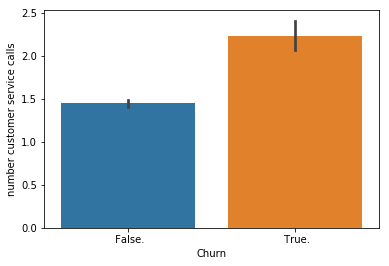

In [155]:
#Visualizing the Average Number Of Customer Calls
ax3 = sns.barplot(x = "Churn",y = "number customer service calls",data = df_train)
#Seems Like Churn Was High For Customers Who Were Called Quite Often

In [156]:
#Developing The Random Forest Model
#First Removing the variables in the numeric variables that were causing multicollinearity in Train Data
for i in list_removed:
    df_train = df_train.drop(i,axis = 1)
    

In [157]:
#Removing the same variables in Test Data
for i in list_removed:
    df_test = df_test.drop(i,axis = 1)

In [158]:
#Encoding Variables In Train Data
df_train["international plan"] = df_train["international plan"].replace(" yes",1)
df_train["voice mail plan"] = df_train["voice mail plan"].replace(" yes",1)
df_train["international plan"] = df_train["international plan"].replace(" no",0)
df_train["voice mail plan"] = df_train["voice mail plan"].replace(" no",0)
df_train["Churn"] = df_train["Churn"].replace(" False.",0)
df_train["Churn"] = df_train["Churn"].replace(" True.",1)


In [159]:
#Encoding Variables In Test Data
df_test["international plan"] = df_test["international plan"].replace(" yes",1)
df_test["voice mail plan"] = df_test["voice mail plan"].replace(" yes",1)
df_test["international plan"] = df_test["international plan"].replace(" no",0)
df_test["voice mail plan"] = df_test["voice mail plan"].replace(" no",0)
df_test["Churn"] = df_test["Churn"].replace(" False.",0)
df_test["Churn"] = df_test["Churn"].replace(" True.",1)

In [160]:
df_train.head(10)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night calls,total night charge,total intl minutes,total intl calls,number customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,197.4,99,91,11.01,10.0,3,1,0
1,OH,107,415,0,1,26,161.6,123,195.5,103,103,11.45,13.7,3,1,0
2,NJ,137,415,0,0,0,243.4,114,121.2,110,104,7.32,12.2,5,0,0
3,OH,84,408,1,0,0,299.4,71,61.9,88,89,8.86,6.6,7,2,0
4,OK,75,415,1,0,0,166.7,113,148.3,122,121,8.41,10.1,3,3,0
5,AL,118,510,1,0,0,223.4,98,220.6,101,118,9.18,6.3,6,0,0
6,MA,121,510,0,1,24,218.2,88,348.5,108,118,9.57,7.5,7,3,0
7,MO,147,415,1,0,0,157.0,79,103.1,94,96,9.53,7.1,6,0,0
8,LA,117,408,0,0,0,184.5,97,351.6,80,90,9.71,8.7,4,1,0
9,WV,141,415,1,1,37,258.6,84,222.0,111,97,14.69,11.2,5,0,0


In [161]:
#Using Label Encoder From Scikit Learn on train data and test data
lb = LabelEncoder()
df_train["State_code"] = lb.fit_transform(df_train["state"])

In [162]:
df_test["State_code"] = lb.fit_transform(df_test["state"])


In [163]:
#Dropping the state column in both train and test data
df_train.drop("state",axis = 1)
df_test.drop("state",axis = 1)

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night calls,total night charge,total intl minutes,total intl calls,number customer service calls,Churn,State_code
0,101,510,0,0,0,70.9,123,211.9,73,73,10.62,10.6,3,3,0,11
1,137,510,0,0,0,223.6,86,244.8,139,81,4.24,9.5,7,0,0,26
2,103,408,0,1,29,294.7,95,237.3,105,127,13.51,13.7,6,1,0,35
3,99,415,0,0,0,216.8,123,126.4,88,82,9.93,15.7,2,1,0,32
4,108,415,0,0,0,197.4,78,124.0,101,107,9.20,7.7,4,2,0,40
5,117,415,0,0,0,226.5,85,141.6,68,90,10.04,6.9,5,1,0,12
6,63,415,0,1,32,218.9,124,214.3,125,120,11.71,12.9,3,1,0,28
7,94,408,0,0,0,157.5,97,224.5,112,106,13.99,11.1,6,0,0,18
8,138,510,0,0,0,89.1,117,126.8,46,71,8.57,9.9,4,2,0,24
9,128,415,0,1,43,177.8,100,147.3,89,92,8.74,11.9,1,0,0,43


In [164]:
#Rearranging the Train Data
df_train = df_train[["State_code","account length","area code","international plan","voice mail plan","number vmail messages","total day minutes","total day calls","total eve minutes","total eve calls","total night calls","total night charge","total intl minutes","total intl calls","number customer service calls","Churn"]]

In [165]:
#Rearranging Test Data
df_test = df_test[["State_code","account length","area code","international plan","voice mail plan","number vmail messages","total day minutes","total day calls","total eve minutes","total eve calls","total night calls","total night charge","total intl minutes","total intl calls","number customer service calls","Churn"]]

In [166]:
#Setting the random Seed To make Reproducible Results
random.seed(123)

In [167]:
#Building Random Forest Model On The Train Data
X_train = df_train.iloc[:,0:14] 
y_train = df_train.iloc[:,15]

In [168]:
X_test =  df_test.iloc[:,0:14]
y_test = df_test.iloc[:,15]

In [169]:
#Recoding Some Of The Variables in Train Data
#df_train['international plan'] = df_train['international plan'].astype('category')
#df_train['Churn'] = df_train['Churn'].astype('category')
#df_train['voice mail plan'] = df_train['voice mail plan'].astype('category')
#Recoding some of the variables in test data
#df_train['state'] = df_train['state'].astype('category')
#df_test['international plan'] = df_test['international plan'].astype('category')
#df_test['Churn'] = df_test['Churn'].astype('category')
#df_test['voice mail plan'] = df_test['voice mail plan'].astype('category')

In [170]:
df_train.dtypes

State_code                         int64
account length                     int64
area code                          int64
international plan                 int64
voice mail plan                    int64
number vmail messages              int64
total day minutes                float64
total day calls                    int64
total eve minutes                float64
total eve calls                    int64
total night calls                  int64
total night charge               float64
total intl minutes               float64
total intl calls                   int64
number customer service calls      int64
Churn                              int64
dtype: object

In [171]:
#Building the model
RF_model = RandomForestClassifier(n_estimators = 100).fit(X_train,y_train)

In [172]:
#Making Predictions
predictions_rf_model = RF_model.predict(X_test)

In [173]:
#Confusion Matrix
cm_rf_model = pd.crosstab(y_test,predictions_rf_model)

In [174]:
cm_rf_model

col_0,0,1
Churn,,
0,1440,3
1,112,112


In [175]:
#Accuracy = 93.40
(1443+114)/1667

0.9340131973605279

In [176]:
#Sensitivity = 98.26
114/(114+0)

1.0

In [177]:
#Specificity = 92.84
1443/(1443+114)

0.9267822736030829

In [178]:
#Using The Hypertuned Parameters:
#RF_model_tuned = RandomForestClassifier(n_estimators = 100,max_features = 14,criterion = 'gini').fit(X_train,y_train)
#max_features
#criterion
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = [3,8,10,12,14]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 50, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'max_features': [3, 8, 10, 12, 14], 'max_depth': [1, 13, 25, 37, 50, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [179]:
rf = RandomForestClassifier()

In [180]:
#Create Random Tune Grid
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [181]:
#Fit the model along with cross validations
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   28.8s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'max_features': [3, 8, 10, 12, 14], 'max_depth': [1, 13, 25, 37, 50, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [182]:
#Find Best Params
rf_random.best_params_

{'n_estimators': 136,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 10,
 'max_depth': None,
 'bootstrap': True}

In [183]:
#Predict On Test Set
predictions_rf_model_tuned = rf_random.predict(X_test)

In [184]:
#Build Confusion Matrix Of Tuned Model
cm_rf_random = pd.crosstab(y_test,predictions_rf_model_tuned)

In [185]:
cm_rf_random

col_0,0,1
Churn,,
0,1441,2
1,102,122


In [186]:
#Accuracy = 93.88%
(1441+122)/1667

0.937612477504499

In [187]:
#Sesitivity = 98.41%
122/(122+2)

0.9838709677419355

In [188]:
#Specificity = 93.51%
1441/(1441+102)

0.9338950097213221

In [189]:
#Logistic Regression Development

In [190]:
logistic_model = sm.Logit(y_train,X_train).fit()

Optimization terminated successfully.
         Current function value: 0.359701
         Iterations 7


In [191]:
#Making Predictions
predictions_probs = logistic_model.predict(X_test)

In [192]:
threshold = 0.5
class_predictions = (predictions_probs > threshold).astype(np.int)

In [193]:
pd.crosstab(y_test,class_predictions)


col_0,0,1
Churn,,
0,1418,25
1,192,32


In [194]:
#Accuracy = 86.98
(1418+32)/1667

0.8698260347930414

In [195]:
#Sensitivity = 56.14
32/(32+25)
#Have To Attain Better Sensitivity

0.5614035087719298

In [196]:
#Specificity = 88.07
1418/(1418+192)


0.8807453416149068

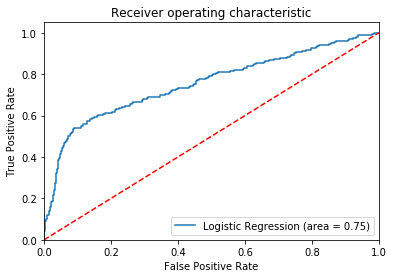

In [197]:
logit_roc_auc = roc_auc_score(y_test, predictions_probs)
fpr, tpr, thresholds = roc_curve(y_test, predictions_probs)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [198]:
#Checking the performance for a threshold value of 0.15
threshold = 0.15

In [199]:
#Turning the class probabilities to class predictions
class_predictions_tuned = (predictions_probs > threshold).astype(np.int)

In [200]:
#Developing Confusion Matrix
pd.crosstab(y_test,class_predictions_tuned)

col_0,0,1
Churn,,
0,997,446
1,70,154


In [201]:
#Accuracy = 69.04
(154+997)/1667

0.6904619076184763

In [202]:
#Sensitivity = 25.66
154/(154+446)

0.25666666666666665

In [203]:
#Specificity = 93.43
997/(997+70)

0.9343955014058107

In [204]:
#In the tuned model we have achieved a better accuracy at predicting the True Churn Cases by getting a tradeoff
#between sensitivity and specificity

In [205]:
#Building The Xgboost 
xg_model = XGBClassifier()

In [206]:
#Fitting the model
xg_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [207]:
#Making predictions
y_pred = xg_model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [208]:
#Printing accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.10%


In [209]:
y_pred = pd.Series(y_pred)
y_test = pd.Series(y_test)

In [210]:
df_confusion = pd.crosstab(y_test, y_pred)

In [211]:
df_confusion

col_0,0,1
Churn,,
0,1441,2
1,113,111


In [212]:
#Sensitivity = 98.23
111/(111 +2)

0.9823008849557522

In [213]:
#Specificity = 92.72
1441/(1441+113)

0.9272844272844273

In [214]:
#Hypertuning the Xg_boost model
X = X_train
y = y_train

In [215]:
#Tuning the number of trees in Xg_boost
model_tuned = XGBClassifier()
n_estimators = [50,80,100, 200, 300, 400]
param_grid = dict(n_estimators = n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model_tuned, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X,y)


In [216]:
#Summarizing the result of tuning the number of trees 
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))


Best: -0.257084 using {'n_estimators': 200}
-0.262724 (0.035171) with: {'n_estimators': 50}
-0.257651 (0.038163) with: {'n_estimators': 80}
-0.257355 (0.039154) with: {'n_estimators': 100}
-0.257084 (0.045351) with: {'n_estimators': 200}
-0.259596 (0.050767) with: {'n_estimators': 300}
-0.262383 (0.053141) with: {'n_estimators': 400}


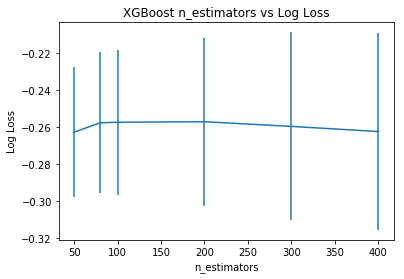

In [217]:
# n_estimators = 200 is the best parameter. Let us see graphically
plt.errorbar(n_estimators, means, yerr=stds)
plt.title("XGBoost n_estimators vs Log Loss")
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators.png')

In [218]:
#Determining max depth for the best performance
model_Xg_tune2 = XGBClassifier(n_estimators = 200)

In [219]:
#Setting the tune grid and k-fold sampling
max_depth = range(1,12,1)
print(max_depth)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model_Xg_tune2, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X,y)

range(1, 12)
Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    7.8s finished


In [220]:
#Printing the best results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.255090 using {'max_depth': 4}
-0.325768 (0.028521) with: {'max_depth': 1}
-0.277408 (0.035872) with: {'max_depth': 2}
-0.257084 (0.045351) with: {'max_depth': 3}
-0.255090 (0.049369) with: {'max_depth': 4}
-0.263806 (0.054553) with: {'max_depth': 5}
-0.274450 (0.063284) with: {'max_depth': 6}
-0.281009 (0.065821) with: {'max_depth': 7}
-0.298297 (0.073959) with: {'max_depth': 8}
-0.307789 (0.078051) with: {'max_depth': 9}
-0.312718 (0.078257) with: {'max_depth': 10}
-0.321406 (0.079076) with: {'max_depth': 11}


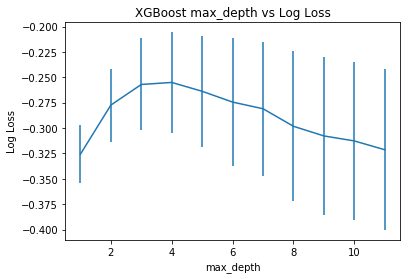

In [221]:
#plotting the results
plt.errorbar(max_depth, means, yerr=stds)
plt.title("XGBoost max_depth vs Log Loss")
plt.xlabel('max_depth')
plt.ylabel('Log Loss')
plt.savefig('max_depth.png')

In [222]:
#Making A Xgb Classifier with n_estimators = 200 and max_depth = 4
model_final = XGBClassifier(n_estimators = 200,max_depth = 4)

In [223]:
#Training The Tuned Xgboost Model
model_final.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [224]:
#Making The Predictions
final_preds_xg = model_final.predict(X_test)
predictions = [round(value) for value in final_preds_xg]

In [225]:
#Turning The Values into a pandas Series
predictions = pd.Series(predictions)
y_test = pd.Series(y_test)

In [226]:
#Developing The Confusion Matrix
confusion_matrix_xg = pd.crosstab(y_test,predictions)

In [227]:
confusion_matrix_xg

col_0,0,1
Churn,,
0,1440,3
1,104,120


In [228]:
#Accuracy = 93.58
(120+1440)/1667

0.9358128374325135

In [229]:
#Sesnsitivity = 97.56
120/(120+3)

0.975609756097561

In [230]:
#Specificity = 93.26
1440/(1440+104)

0.9326424870466321

In [296]:

#---------------------------End of Code----------------------------